### Observations:
1. In rural areas, the average fare varies tremendously (~\\$25-\\$45), regardless of the number of rides or number of drivers. Since the availability of drivers is not affecting the ride costs, the variation must be due to distance traveled.

2. Comparatively, the average fare for urban areas tends to concentrate around the $25 range, regardless of the number of rides or number of drivers. This probably indicates shorter distances compared to rural and suburban areas.

3. The competition for rides in urban areas is higher than in rural and suburban areas. This is indicated by the urban area having 68.4% of the total rides but 81% of the drivers. In contrast, rural drivers are only 2.6% of the drivers, but 5.3% of the rides.

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Files to Load
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data)
ride_data_df = pd.read_csv(ride_data)

# Combine the data into a single dataset
city_ride_df = pd.merge(ride_data_df,city_data_df, on="city", how="left")

# Display the data table for preview
city_ride_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


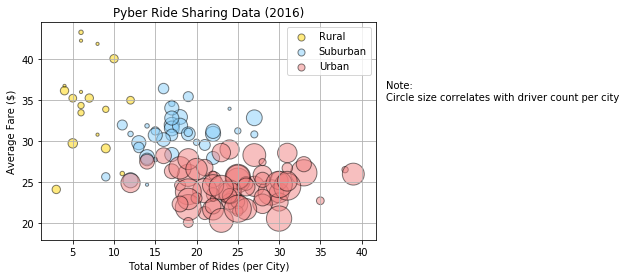

In [2]:
#====================================
#= Bubble Plot of Ride Sharing Data =
#====================================

# Collect and group the data for each city type
#==============================================

# Create a df for each type then group by city into series to
# find the number of rides (x), avg. ride fare (y) and the 
# driver counts for the size of the bubbles 

city_rural_df = city_ride_df.loc[city_ride_df["type"] == "Rural",:]
rural_rides_ser = city_rural_df.groupby("city")["fare"].count()
rural_fares_ser = city_rural_df.groupby("city")["fare"].mean()
rural_dr_ct_ser = city_rural_df.groupby("city")["driver_count"].max()

city_subur_df = city_ride_df.loc[city_ride_df["type"] == "Suburban",:]
subur_rides_ser = city_subur_df.groupby("city")["fare"].count()
subur_fares_ser = city_subur_df.groupby("city")["fare"].mean()
subur_dr_ct_ser = city_subur_df.groupby("city")["driver_count"].max()

city_urban_df = city_ride_df.loc[city_ride_df["type"] == "Urban",:]
urban_rides_ser = city_urban_df.groupby("city")["fare"].count()
urban_fares_ser = city_urban_df.groupby("city")["fare"].mean()
urban_dr_ct_ser = city_urban_df.groupby("city")["driver_count"].max()


# Build the scatter plots for each city types
plt.scatter(rural_rides_ser, rural_fares_ser, marker="o", facecolors="Gold", edgecolors="black", s=rural_dr_ct_ser*10, alpha=.5, label="Rural")
plt.scatter(subur_rides_ser, subur_fares_ser, marker="o", facecolors="LightSkyBlue", edgecolors="black", s=subur_dr_ct_ser*10, alpha=.5, label="Suburban")
plt.scatter(urban_rides_ser, urban_fares_ser, marker="o", facecolors="LightCoral", edgecolors="black", s=urban_dr_ct_ser*10, alpha=.5, label="Urban")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)

# Create a legend
lgnd = plt.legend(loc="upper right")
# the extra code below is needed to make the legend symbols the same size
lgnd.legendHandles[0]._sizes = [50]
lgnd.legendHandles[1]._sizes = [50]
lgnd.legendHandles[2]._sizes = [50]

# Incorporate a text label regarding circle size
plt.text(43,35,"Note:\nCircle size correlates with driver count per city")

# Save Figure
plt.savefig("pyber_ride_sharing_data_2016.png",bbox_inches="tight")

# Show plot
plt.show()

## Total Fares by City Type

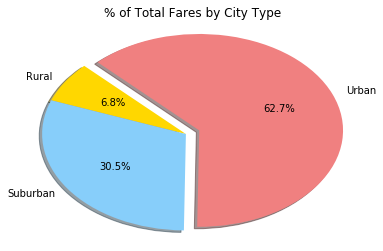

In [3]:
# Calculate Type Percents
#=========================

# Add up the fares in each of the areas and in the complete dataframe
fareall=city_ride_df["fare"].sum()
farerur=city_rural_df["fare"].sum()
faresub=city_subur_df["fare"].sum()
fareurb=city_urban_df["fare"].sum()

#Calculate the percentages
farerurp=farerur/fareall
faresubp=faresub/fareall
fareurbp=fareurb/fareall

# Build Pie Chart
types=["Rural","Suburban","Urban"]
slices = [farerurp,faresubp,fareurbp]
colors = ["Gold","LightSkyBlue","LightCoral"]
explode = (0, 0, 0.1)


plt.title("% of Total Fares by City Type")
plt.pie(slices, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=135)
plt.axis("auto")

# Save Figure
plt.savefig("pyber_total_fares_by_city_type.png",bbox_inches="tight")

# plot chart
plt.show()

## Total Rides by City Type

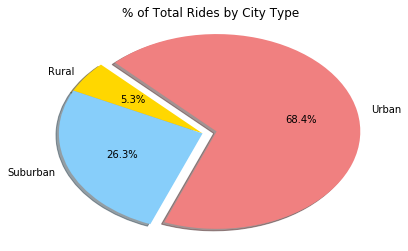

In [4]:
# Calculate Type Percents
#=========================

# Count the *number* of fares (= number of rides) for all and each area
rideall=city_ride_df["fare"].count()
riderur=city_rural_df["fare"].count()
ridesub=city_subur_df["fare"].count()
rideurb=city_urban_df["fare"].count()

#Calculate the percentages
riderurp=riderur/rideall
ridesubp=ridesub/rideall
rideurbp=rideurb/rideall

# Build Pie Chart
types=["Rural","Suburban","Urban"]
slices = [riderurp,ridesubp,rideurbp]
colors = ["Gold","LightSkyBlue","LightCoral"]
explode = (0, 0, 0.1)

plt.title("% of Total Rides by City Type")
plt.pie(slices, explode=explode, labels=types, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=135)
plt.axis("auto")

# Save Figure
plt.savefig("pyber_total_rides_by_city_type.png",bbox="tight")

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

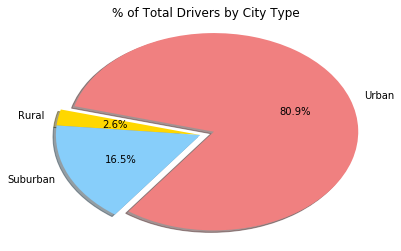

In [6]:
# Calculate Type Percents
#=========================

# Add up the driver count overall and in each of the areas (use the city data only)
driverall=city_data_df["driver_count"].sum()
driverrur=city_data_df[city_data_df["type"] == "Rural"].groupby("type")["driver_count"].sum()
driversub=city_data_df[city_data_df["type"] == "Suburban"].groupby("type")["driver_count"].sum()
driverurb=city_data_df[city_data_df["type"] == "Urban"].groupby("type")["driver_count"].sum()

# Calculate the percentages
driverrurp=driverrur/driverall
driversubp=driversub/driverall
driverurbp=driverurb/driverall

# Build Pie Chart
types=["Rural","Suburban","Urban"]
slices = [driverrurp,driversubp,driverurbp]
colors = ["Gold","LightSkyBlue","LightCoral"]
explode = (0, 0, 0.1)

plt.title("% of Total Drivers by City Type")
plt.pie(slices, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=165)
plt.axis("auto")

# Save Figure
plt.savefig("pyber_total_drivers_by_city_type.png")

# Show Figure
plt.show()